### 决策树VS随机森林

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data= load_breast_cancer()
X,y= data.data,data.target

random_state=0
n_tree=150

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=random_state)



### 决策树

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree_decision= DecisionTreeClassifier(random_state=random_state)
tree_decision.fit(X_train,y_train)
score_decision=tree_decision.score(X_test,y_test)
print("{}".format(score_decision))

0.8811188811188811


In [5]:
from sklearn.ensemble import RandomForestClassifier
tree_random=RandomForestClassifier(random_state=random_state)
tree_random.fit(X_train,y_train)
score_random=tree_random.score(X_test,y_test)
print("{}".format(score_random))

0.972027972027972


In [6]:
ensemble_clf=[("gini",RandomForestClassifier(oob_score=True,criterion='gini')),("entropy",RandomForestClassifier(oob_score=True, criterion='entropy'))]
min=15
max=150

oob_error_dict= dict()
for label,clf in ensemble_clf:
    oob_error_list=[]
    for i in range(min,max+1,5):
        clf.set_params(n_estimators=i,random_state=random_state)
        clf.fit(X,y)
        oob_error=1-clf.oob_score_
        oob_error_list.append(oob_error)
    oob_error_dict[label]=oob_error_list
oob_error_dict
            


{'gini': [0.05096660808435849,
  0.038664323374341,
  0.03690685413005268,
  0.038664323374341,
  0.03690685413005268,
  0.033391915641476255,
  0.03514938488576447,
  0.033391915641476255,
  0.038664323374341,
  0.03514938488576447,
  0.033391915641476255,
  0.03514938488576447,
  0.033391915641476255,
  0.03163444639718804,
  0.02987697715289983,
  0.03163444639718804,
  0.02987697715289983,
  0.03163444639718804,
  0.03163444639718804,
  0.02987697715289983,
  0.03163444639718804,
  0.03163444639718804,
  0.03163444639718804,
  0.033391915641476255,
  0.03163444639718804,
  0.03163444639718804,
  0.033391915641476255,
  0.033391915641476255],
 'entropy': [0.047451669595782064,
  0.05096660808435849,
  0.04393673110720564,
  0.040421792618629215,
  0.04217926186291743,
  0.03690685413005268,
  0.033391915641476255,
  0.03514938488576447,
  0.038664323374341,
  0.033391915641476255,
  0.033391915641476255,
  0.02987697715289983,
  0.033391915641476255,
  0.03163444639718804,
  0.03514

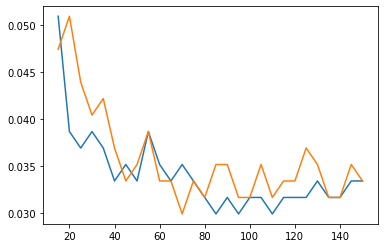

In [7]:
import matplotlib.pyplot as plt
for label,clf_err in oob_error_dict.items():
    x=range(min,max+1,5)
    plt.plot(x,clf_err)


<BarContainer object of 30 artists>

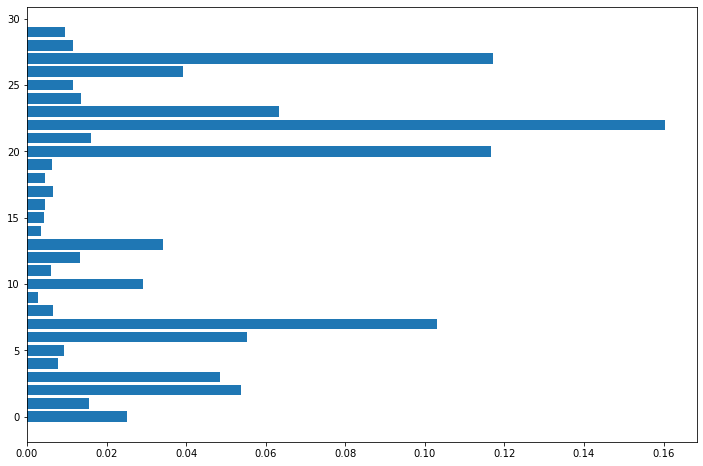

In [8]:
import numpy as np
n_feature=X.shape[1]
plt.figure(figsize=(12,8))
plt.barh(range(n_feature),tree_random.feature_importances_,align='center')


In [9]:
tree_importance_sort_id=np.argsort(tree_random.feature_importances_)
tree_importance_sort_id

array([ 9, 14, 15, 16, 18, 11, 19, 17,  8,  4,  5, 29, 25, 28, 12, 24,  1,
       21,  0, 10, 13, 26,  3,  2,  6, 23,  7, 20, 27, 22], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

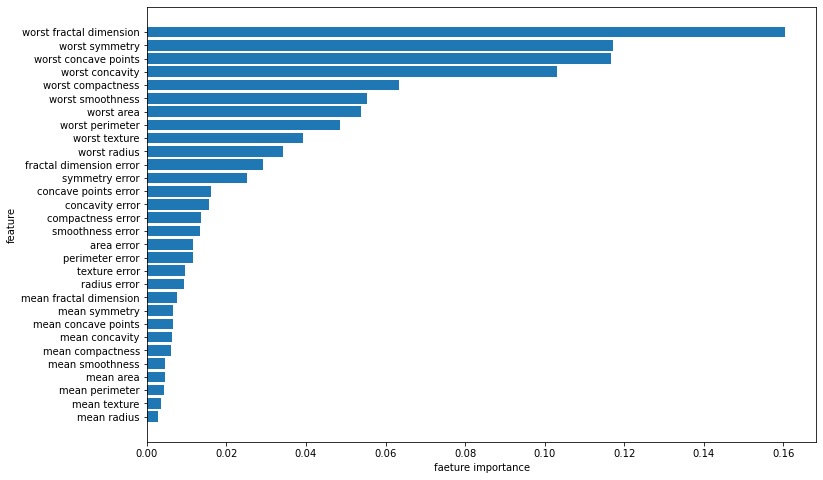

In [10]:
x_feature=X.shape[1]
n_feature=X.shape[1]
plt.figure(figsize=(12,8))
plt.barh(range(n_feature),tree_random.feature_importances_[tree_importance_sort_id],align='center')
plt.yticks(range(n_feature),data.feature_names)
plt.xlabel("faeture importance")
plt.ylabel("feature")
plt.show

In [11]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

clf_ada=AdaBoostClassifier(n_estimators=150,random_state=0)
clf_GBDT=GradientBoostingClassifier(n_estimators=150,random_state=0)
clf,clf_ada,clf_GBDT

(RandomForestClassifier(criterion='entropy', n_estimators=150, oob_score=True,
                        random_state=0),
 AdaBoostClassifier(n_estimators=150, random_state=0),
 GradientBoostingClassifier(n_estimators=150, random_state=0))

In [12]:
from mlxtend.evaluate import bias_variance_decomp

mse_rf,bias_rf,var_rf=bias_variance_decomp(clf,X_train,y_train,X_test,y_test,loss='mse',random_seed=0,num_rounds=5)
mse_ada,bias_ada,var_ada=bias_variance_decomp(clf_ada,X_train,y_train,X_test,y_test,loss='mse',random_seed=0,num_rounds=5)
mse_GBDT,bias_GBDT,var_GBDT=bias_variance_decomp(clf_GBDT,X_train,y_train,X_test,y_test,loss='mse',random_seed=0,num_rounds=5)


In [13]:
import pandas as pd
pd.DataFrame(data=[[mse_rf,bias_rf,var_rf],[mse_ada,bias_ada,var_ada],[mse_GBDT,bias_GBDT,var_GBDT]],
index=["rf","adaboost","GBDT"],columns=["mse","bias","var"])

,mse,bias,var
rf,0.044755,0.031888,0.012867
adaboost,0.040559,0.015944,0.024615
GBDT,0.043357,0.024336,0.019021
